In [1]:
import numpy as np 
from scipy.constants.constants import C2K, K2C
import math
from scipy import optimize as opt # for optimization
import matplotlib.pyplot as plt
from matplotlib import cm
from flow_stress.flow_stress import *

In [23]:
#testing testing testing
temp = range(300, 600)
pressure = [400]
grain_size = range(3, 35, 3)#range(5,10)#[10,12,13,16,27,29]##[5,6,7,8,9,10,11,12,13,14,15,30] #List of grainsizes 
width = [30]

In [19]:
temperature= 723
pressure = 400000000

In [20]:
calculate_coefficient_table(temperature)
print CS

#Optimizing equation to solve for volume
def fugacity_optimizer(temperature,pressure):

    def fun(v):
        return eos(temperature, v)- pressure
    volume = opt.brentq(fun, 5, 30) #Volume in cc/mo

    #Calculate fugacity 
    fugacity = PSfug(pressure, temperature, volume)
    
    return fugacity



[  3.92406811e+02   2.06308990e-02   2.72861397e-01  -4.39001837e-01
   4.66093605e+01   1.09178830e-01   1.91240538e+02   9.74595882e+01
  -1.35436597e+00   2.49844499e+02]


In [21]:
fugacity_optimizer(temperature, pressure)

116.6204752272425

In [71]:
min(p)

400000000

[[ 116.61099121  113.78768773  113.55866381  113.12082534]
 [ 138.49034277  133.88534084  133.50398644  132.77049306]
 [ 163.86853676  156.98036304  156.40468108  155.29442713]
 [ 193.27142892  183.49502576  182.67463295  181.09045112]]


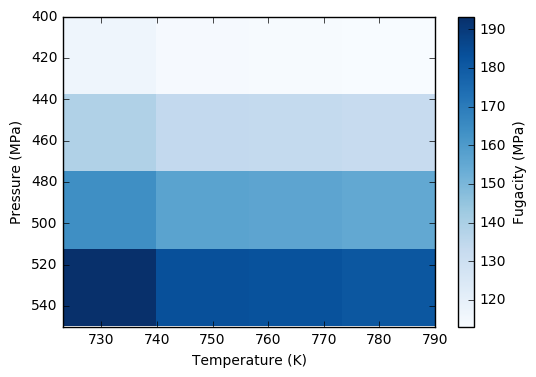

In [84]:
t = np.array([723.15, 775, 780, 790])
p = np.array([400000000, 450000000, 500000000, 550000000])
T, P = np.meshgrid(t,p)

fugacity_optimizer_vectorized = np.vectorize(fugacity_optimizer)

result_array = fugacity_optimizer_vectorized(T, P)
print(result_array)

im = plt.imshow(result_array, cmap=plt.cm.Blues, interpolation="none", aspect="auto",extent=[min(t),max(t),550, 400])
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (MPa)')
plt.colorbar(im, label='Fugacity (MPa)')
plt.show()

In [47]:
A = np.ones([2, 10])
print(A)

def f(x):
    return x * x + 3 * x - 2 if x > 0 else x * 5 + 8

fv = np.vectorize(f, otypes=[np.float])  



result_array = fv(A)
print(result_array)

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]
[[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]]


In [41]:
np.array([10, 20, 30, 40, 50],[10, 20, 30, 40, 50])

TypeError: data type not understood

In [6]:
CS = np.zeros([10])

import numpy as np
temp = range(400, 402)
temp = C2K(temp)
press = [400000000, 410000000]
fug = []
for t in temp:
    for p in press:
        cs = calculate_coefficient_table(t)
        fu = fugacity_optimizer(t,p)
        fug.append(fu)

print(fug)

[86.11912549447844, 89.26649890835894, 86.69906427970614, 89.86527649018399]


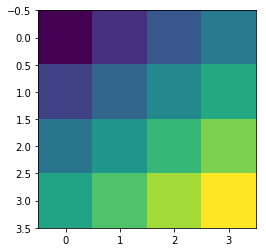

array([[  2.29260000e+11,   2.30060000e+11,   2.30860000e+11,
          2.31660000e+11],
       [  2.30406300e+11,   2.31210300e+11,   2.32014300e+11,
          2.32818300e+11],
       [  2.31552600e+11,   2.32360600e+11,   2.33168600e+11,
          2.33976600e+11],
       [  2.32698900e+11,   2.33510900e+11,   2.34322900e+11,
          2.35134900e+11]])

In [40]:
t = np.linspace(300, 306, 4, dtype=int)
t = C2K(t)
p = np.linspace(400, 406, 4, dtype=int)
p = p*1.0E6

def mesh_fun(xx, yy):
    zz = xx*yy
    return zz 

tt, pp = np.meshgrid(t, p)

zz = mesh_fun(tt, pp)

plt.imshow(zz)
plt.show()
zz

In [35]:
fug = []
print(type(t))
print(t)
for i in tt:
    for j in pp:
        cs = calculate_coefficient_table(i)
        fu = fugacity_optimizer(i,j)
        fug.append(fu)
print fug

<type 'numpy.ndarray'>
[ 573.15  575.15  577.15  579.15]


TypeError: only length-1 arrays can be converted to Python scalars

In [51]:
CS = np.zeros([10])
temperature = 659#[400]#, 401]#range(400, 402)

for i in range(0, len(PS_COEFF)):
    #for j in temperature:
    CS[i]=PS_COEFF[i][0]*np.power(temperature,-4)+PS_COEFF[i][1]*np.power(temperature,-2)\
    +PS_COEFF[i][2]*np.power(temperature,-1)\
    +PS_COEFF[i][3]+PS_COEFF[i][4]*temperature+PS_COEFF[i][5]*np.power(temperature,2)
    

print CS

[  5.13599510e+01   0.00000000e+00   0.00000000e+00  -4.27198750e-01
  -1.65801670e+01   1.09178830e-01   7.55911050e+00   1.88106750e+02
  -2.35303180e+01   1.22467770e+02]


In [31]:
CS2 = np.zeros([10])
temperature = 701#[400]#, 401]#range(400, 402)

for i in range(0, len(PS_COEFF)):
    #for j in temperature:
    CS2[i]=PS_COEFF[i][0]*np.power(temperature,-4)+PS_COEFF[i][1]*np.power(temperature,-2)\
    +PS_COEFF[i][2]*np.power(temperature,-1)\
    +PS_COEFF[i][3]+PS_COEFF[i][4]*temperature+PS_COEFF[i][5]*np.power(temperature,2)
    
print CS2

[  5.13599510e+01   0.00000000e+00   0.00000000e+00  -4.27198750e-01
  -1.65801670e+01   1.09178830e-01   7.55911050e+00   1.88106750e+02
  -2.35303180e+01   1.22467770e+02]


In [36]:
CS3 = np.zeros([10])
temperature = 772#[400]#, 401]#range(400, 402)

for i in range(0, len(PS_COEFF)):
    #for j in temperature:
    CS3[i]=PS_COEFF[i][0]*np.power(temperature,-4)+PS_COEFF[i][1]*np.power(temperature,-2)\
    +PS_COEFF[i][2]*np.power(temperature,-1)\
    +PS_COEFF[i][3]+PS_COEFF[i][4]*temperature+PS_COEFF[i][5]*np.power(temperature,2)

print CS3

[  5.13599510e+01   0.00000000e+00   0.00000000e+00  -4.27198750e-01
  -1.65801670e+01   1.09178830e-01   7.55911050e+00   1.88106750e+02
  -2.35303180e+01   1.22467770e+02]


In [34]:
del CS, CS2, CS3

In [ ]:
#Learning MeshGrid 


# tt, pp = np.meshgrid(np.linspace(300, 400, 25), np.linspace(100, 600, 25))
# tt_K = C2K(np.array(tt))
# pp_P = np.array(pp)*1.0E6
# tt.shape


tt, pp = np.meshgrid(np.linspace(300, 306, 3), np.linspace(400, 406, 3))
#print tt

a = np.linspace(300, 306, 4)
b = np.linspace(400, 406, 4)
aa, bb = np.meshgrid(a, b)
# print(aa)
# print(bb)

cc = aa*bb
plt.imshow(cc)
plt.show()